## Basics of ANN: Lab 4
### Tasks:
* Plot the error
* Model XOR with the help of sigmoid and linear


In [2]:
import numpy as np
import matplotlib.pyplot as plt

k = 1
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-k*x))

def sigmoid_prime(x):
    return sigmoid(x)*(1.0-sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1.0 - x**2

def linear(x):
    return x

def linear_prime(x):
    return 1


In [34]:
import numpy as np


class NeuralNetwork:

    def __init__(self, layers, actF):
        if actF == 'sigmoid':
            self.activation = sigmoid
            self.activation_prime = sigmoid_prime
        elif actF == 'tanh':
            self.activation = tanh
            self.activation_prime = tanh_prime
        else:
            self.activation = linear
            self.activation_prime = linear_prime
            
        self.AveErr = []
        self.MSE = []
        
        # Set weights
        self.weights = []
        # layers = [2,2,1]
        # range of weight values (-1,1)
        # input and hidden layers - random((2+1, 2+1)) : 3 x 3
        
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
            print(r)
        # output layer - random((2+1, 1)) : 3 x 1
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        print(r)
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        # Add column of ones to X
        # This is to add the bias unit to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
         
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            # output layer
            error = y[i] - a[-1]
            deltas = [error * self.activation_prime(a[-1])]
            
            self.MSE.append(np.sum(np.power(error,2)))
            self.AveErr.append(np.average(np.abs(error)))
            

            # we need to begin at the second to last layer 
            # (a layer before the output layer)
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight.
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)

            if k % 10000 == 0: 
                print('epochs:', k)

    def predict(self, x): 
    
        a = np.concatenate((np.ones(1).T, np.array(x)))      

        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

if __name__ == '__main__':

    nn = NeuralNetwork([2,2,1],'sigmiod')
    X_train = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y_train = np.array([0, 1, 1, 0])
    X_test = np.array([[-1, -1],
                  [-1, 1],
                  [1, -1],
                  [1, 1]])
    y_test = np.array([0, 1, 1, 0])

    nn.fit(X_train, y_train)
    for e in X_test:
        print(e,nn.predict(e))

[[-0.77223998 -0.16417758  0.87520168]
 [-0.17780055 -0.60400367  0.25728612]
 [-0.71697251 -0.13916236  0.09913884]]
[[-0.68217702]
 [-0.19884521]
 [ 0.20198492]]
epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000
[-1 -1] [0.77388583]
[-1  1] [0.66252774]
[ 1 -1] [0.5834119]
[1 1] [0.47205381]


### Task 1

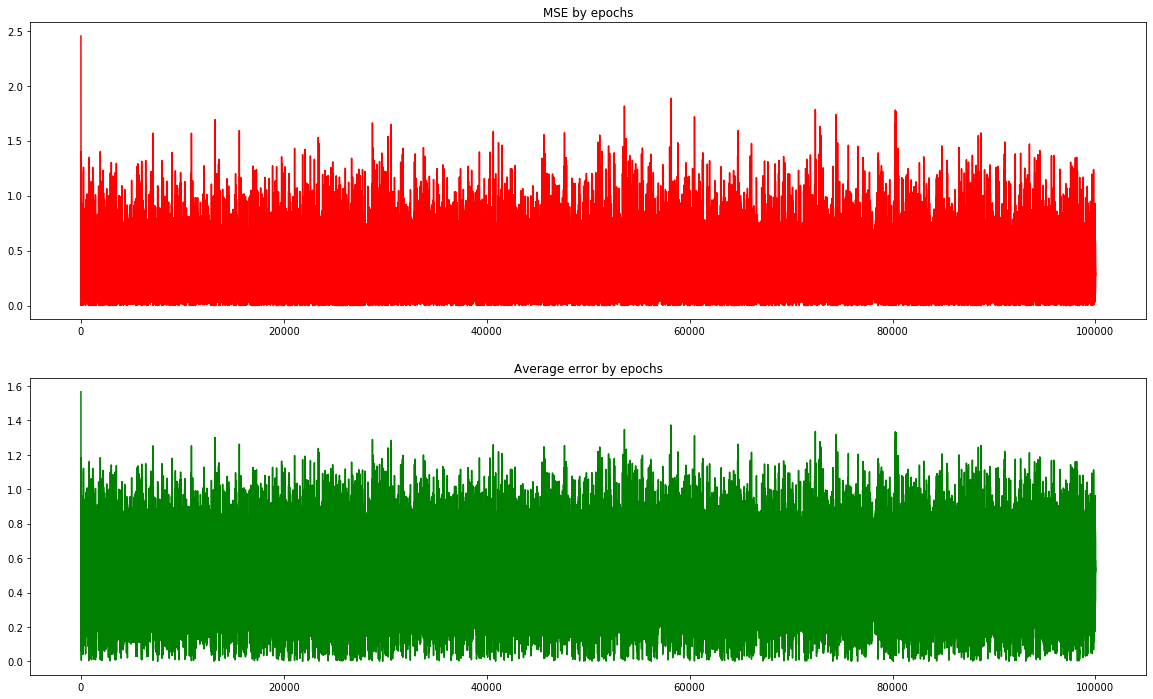

In [35]:
import matplotlib.gridspec as gridspec
fig = plt.figure(constrained_layout=True,figsize = (20,12))
gs = gridspec.GridSpec(2, 1)

ax = fig.add_subplot(gs[0, 0])
plt.plot(range(100000),nn.MSE,'r')
ax.set_title('MSE by epochs')

ax = fig.add_subplot(gs[1, 0])
ax.set_title('Average error by epochs')
plt.plot(range(100000),nn.AveErr,'g')

[[ 0.20265263  0.72048672 -0.01930637]
 [ 0.45191057 -0.13197554 -0.36579346]
 [-0.02392449  0.81518689 -0.58996749]]
[[ 0.74471112]
 [ 0.65945637]
 [-0.87599841]]
epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000


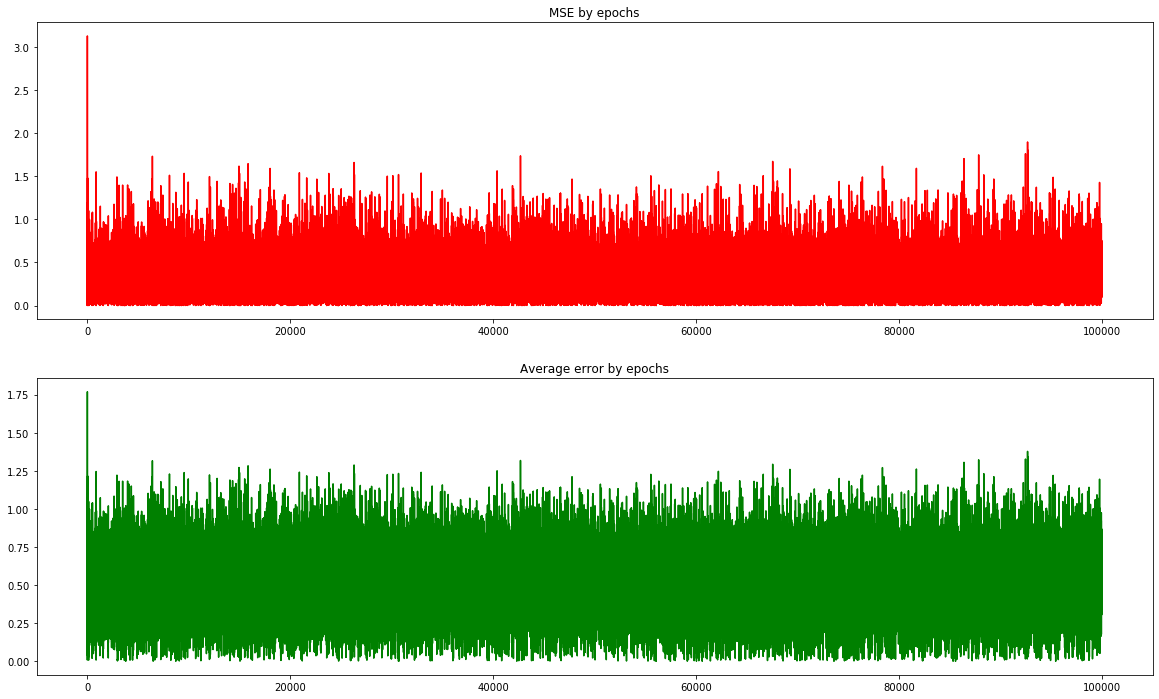

In [31]:
nn = NeuralNetwork([2,2,1],'linear')
nn.fit(X_train, y_train)
fig = plt.figure(constrained_layout=True,figsize = (20,12))
gs = gridspec.GridSpec(2, 1)

ax = fig.add_subplot(gs[0, 0])
plt.plot(range(100000),nn.MSE,'r')
ax.set_title('MSE by epochs')

ax = fig.add_subplot(gs[1, 0])
ax.set_title('Average error by epochs')
plt.plot(range(100000),nn.AveErr,'g')

[[ 0.40834171 -0.61814074 -0.23294403]
 [ 0.98383835 -0.88158441 -0.38446251]
 [-0.59008129  0.24525352 -0.02438579]]
[[-0.22605488]
 [-0.74675417]
 [ 0.59927788]]
epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000


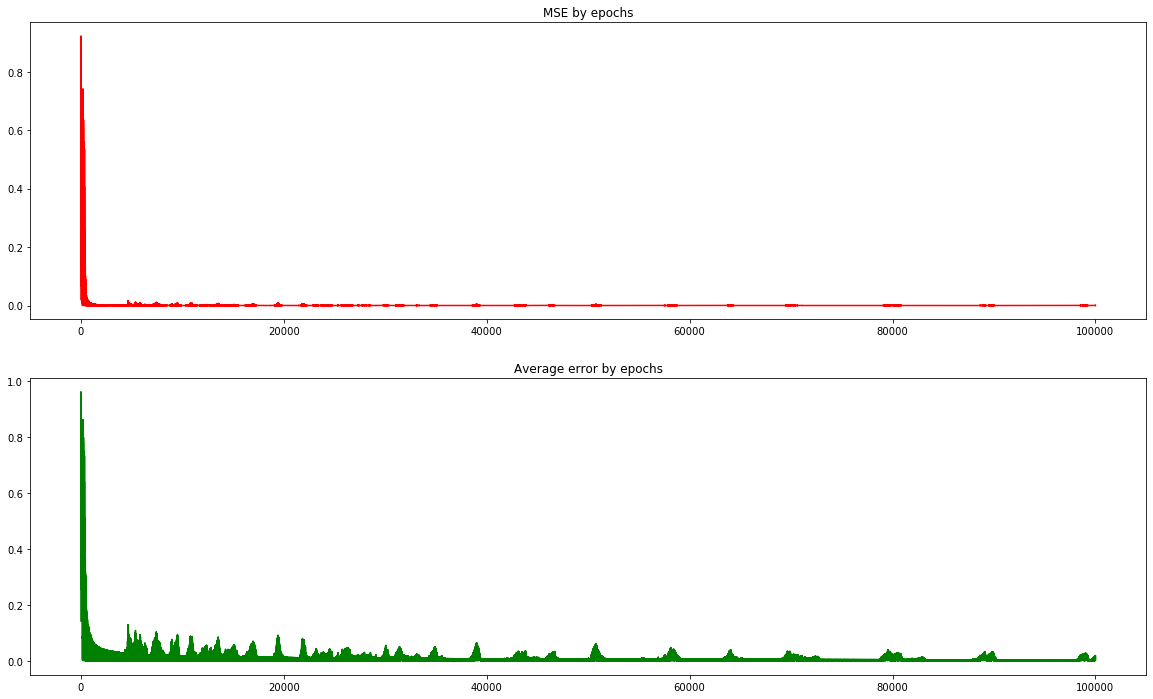

In [32]:
nn = NeuralNetwork([2,2,1],'tanh')
nn.fit(X_train, y_train)
fig = plt.figure(constrained_layout=True,figsize = (20,12))
gs = gridspec.GridSpec(2, 1)

ax = fig.add_subplot(gs[0, 0])
plt.plot(range(100000),nn.MSE,'r')
ax.set_title('MSE by epochs')

ax = fig.add_subplot(gs[1, 0])
ax.set_title('Average error by epochs')
plt.plot(range(100000),nn.AveErr,'g')